In [459]:
import seaborn as sns
import pandas as pd
import numpy as np
#şimdi bir veri seti yüklüyoruz
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [460]:
#veriye ilk bakış ve veri setinin hikayesi

In [461]:
#veri setinin hikayesi veri biliminde çok önemlidir

In [462]:
df=planets.copy()
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [463]:
df.info()
#rangeindex gözlem sayısını ifade eder
#objectler genellikle kategorik değişkenlerdir 
#kategorik değişkene değiştirmemiz daha iyi olur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [464]:
df.method=pd.Categorical(df.method) 
#method objesini kategorik değişkene dönüştürdüm

In [465]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [466]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [467]:
#veri setinin betimlenmesi

In [468]:
df.shape

(1035, 6)

In [469]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [470]:
df.describe().T
#eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır
#bazen sayısal değişkenlerde kategorik değişken olabilir

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [471]:
df.describe(include="all").T
#daha kapsamlı bakış atmamızı sağlar

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


In [472]:
#eksik değerlerin incelenmesi

In [473]:
#hiç eksik gözlem var mı sorgulaması
df.isnull().values.any()

True

In [474]:
#toplam eksik değer sayısı
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [475]:
#bütün nan ifadelerinin yerine 0 basabiliriz lakin bu sağlıklı olmaz ortalama ilede doldurulabilir
#df["değişken_ismi"].fillna(df.orbital_period.mean(),inplace=True)

In [476]:
#kategorik değişken özetleri
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [477]:
#dataframe içersinden istediğimiz değişkene göre eleman çekmek için kullanılır
kat_df=df.select_dtypes(include=["object"])
kat_df

""
0
1
2
3
4
...
1030
1031
1032
1033


In [478]:
kat_df=df.select_dtypes(["category"])
kat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [479]:
#kategorik değişkenlerin sınıflarına ve sayısına erişmek
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [480]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [481]:
kat_df["method"].value_counts()
#kategorik değişkenlerin frekans değeri

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [482]:
kat_df["method"].value_counts().count()

10

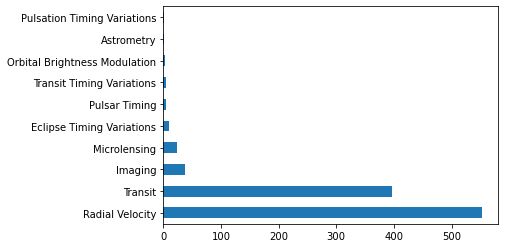

In [483]:
kat_df["method"].value_counts().plot.barh();

In [484]:
#sürekli değişken özellikleri

In [485]:
df_num=df.select_dtypes(include=["float64","int64"])
df_num

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


In [486]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [487]:
df_num["distance"].describe()
#burada sadece belirli bir değişkenin betimsel istatistiklerine ulaştık

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [488]:
#dağılım grafikleri

#barplot

#yeni veri seti elmas veri seti

In [489]:
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [491]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [492]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [493]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [494]:
df["color"].value_counts()
#aralarında nominal bir ilişki mevcut

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [495]:
#ordinal tanımlama

In [496]:
from pandas.api.types import CategoricalDtype

In [497]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [498]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))
df.cut
#sırayla kategorik değişkene dönüşümünü yaptı

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [499]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [500]:
df.cut.head()
#kategorik değişkenlerin sıralaması hatalı bunu düzeltmek lazım

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [501]:
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
cut_kategoriler

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [502]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))
#kategorik değişkenlerin sıralamasını yaptım

In [503]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [504]:
#barplot grafiği çizimi

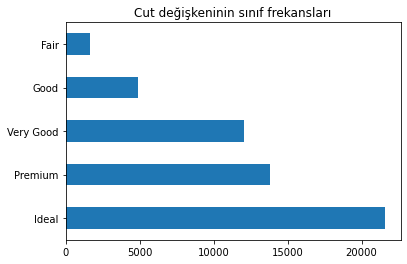

In [505]:
df["cut"].value_counts().plot.barh().set_title("Cut değişkeninin sınıf frekansları");

In [506]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

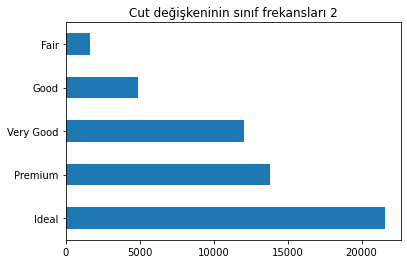

In [507]:
#parantez içine alırisek şu şekilde de yazım gerçekleştirebiliriz
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut değişkeninin sınıf frekansları 2"));
#bunu pandas ile gerçekleştirdik

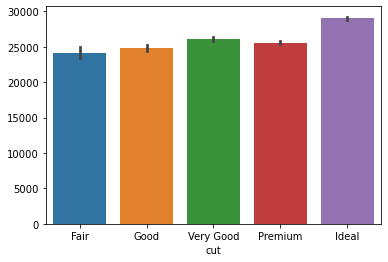

In [508]:
#şimdi ise seaborn kütüphanesi ile gerçekleştireceğim
sns.barplot(x="cut",y=df.cut.index,data=df);

In [509]:
df.cut.index

RangeIndex(start=0, stop=53940, step=1)

In [510]:
#sürun grafik çaprazlamalar
#kırılımları göz önünde bulundurmak
#çaprazlama demek veri setindeki ifadelerin birlikte değerlendirilmesi demektir
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


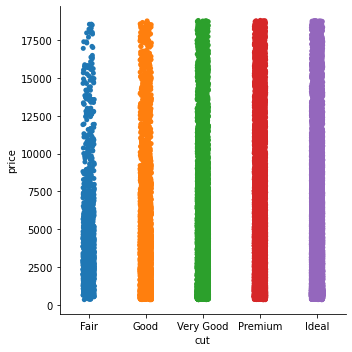

In [511]:
sns.catplot(x="cut",y="price",data=df);

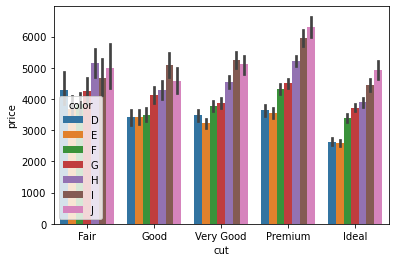

In [512]:
sns.barplot(x="cut",y="price",hue="color",data=df);
#üçüncü bir değişken eklendi daha fazla açıklanabilirlik elde ettik

<AxesSubplot:xlabel='cut', ylabel='price'>

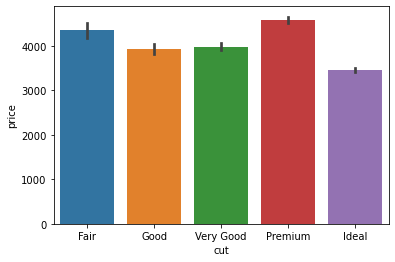

In [513]:
sns.barplot(x="cut",y="price",data=df)

In [514]:
#gruplama kırma işlemi yapacağım
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [515]:
#histogram ve yoğunluk

In [516]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


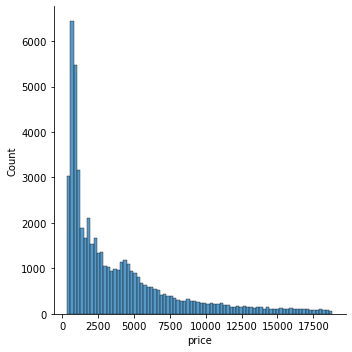

In [517]:
#kde yoğunluk fonksiyonunun koyulup koyulmaması ile alakalı
sns.displot(df.price,kde=False)

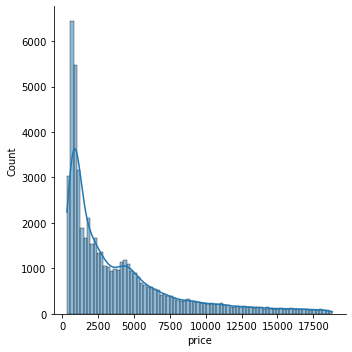

In [518]:
sns.displot(df.price,kde=True)

In [519]:
#histogram grafiği elimizdeki veriyi belirli aralılara böler ve buna göre frekans değerini gösterir

In [520]:
?sns.displot

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

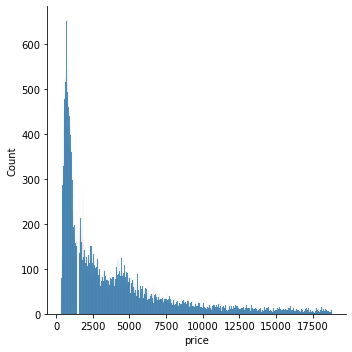

In [521]:
sns.displot(df.price,bins=1000,kde=False)

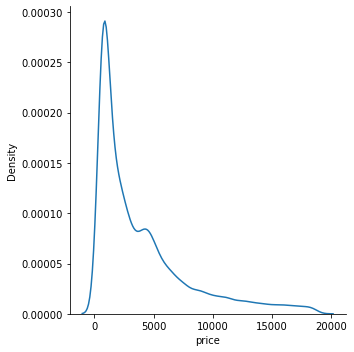

In [522]:
sns.displot(df.price,kind="kde")

In [523]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

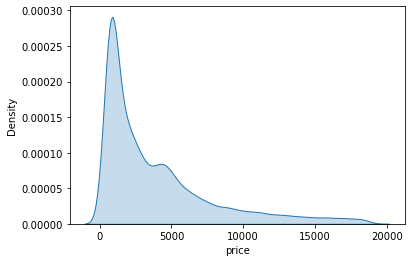

In [524]:
sns.kdeplot(df.price,shade=True)
#altını boyayarak gösterdi
#iki tepeli bir grafik olması demek bunu oluşturan iki farklı değer var demektir

In [525]:
#histogram yoğunluk ve çaprazlamalar

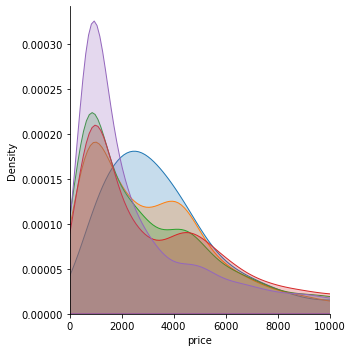

In [526]:
(sns
 .FacetGrid(df,
             hue="cut",
             height=5,
             xlim=(0,10000),
             )
 .map(sns.kdeplot,"price",shade=True));

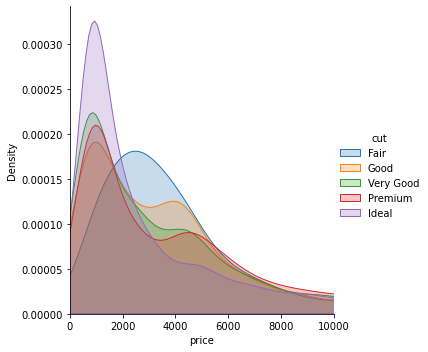

In [527]:
(sns
 .FacetGrid(df,
             hue="cut",
             height=5,
             xlim=(0,10000),
             )
 .map(sns.kdeplot,"price",shade=True)
.add_legend());

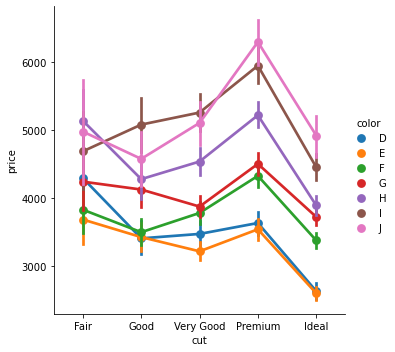

In [528]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df)

In [529]:
#şimdi ise boxplot grafiğine bir göz atacağız

In [530]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [531]:
#veri biliminde amaç veriden değer üretmektir o yüzden tanımadığımız veriden değer üretemeyiz
#herşeyden evvel veriyi tanımamız lazım

In [532]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [533]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [534]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [535]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [536]:
df.shape

(244, 7)

In [537]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [538]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:xlabel='total_bill'>

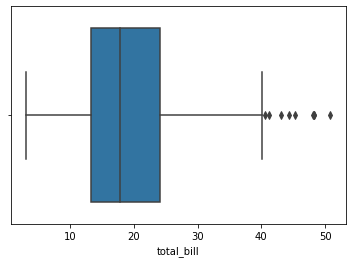

In [539]:
sns.boxplot(x=df["total_bill"])

/Users/mehmetakifkiraz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='total_bill'>

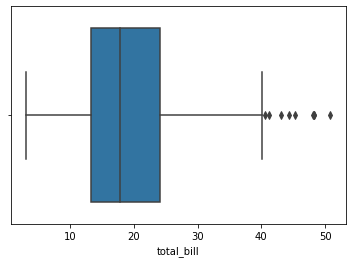

In [540]:
sns.boxplot(x=df["total_bill"],orient="v")

In [541]:
?sns.boxplot

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 

In [542]:
#çaprazlamalar

In [543]:
#hangi günler daha fazla kazanıyoruz şimdi bunu inceleyeceğiz
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


<AxesSubplot:xlabel='day', ylabel='total_bill'>

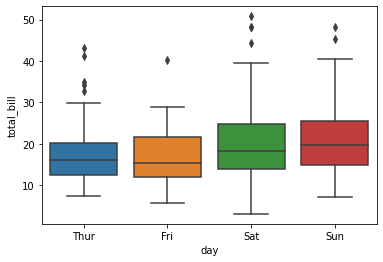

In [544]:
sns.boxplot(x="day",y="total_bill",data=df)

In [545]:
#sabah mı akşam mı daha çok kazanıyoruz

<AxesSubplot:xlabel='time', ylabel='total_bill'>

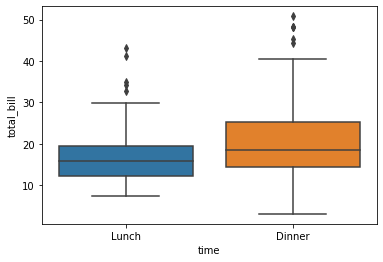

In [546]:
sns.boxplot(x="time",y="total_bill",data=df)

In [547]:
#kisi sayısı kazanç

<AxesSubplot:xlabel='size', ylabel='total_bill'>

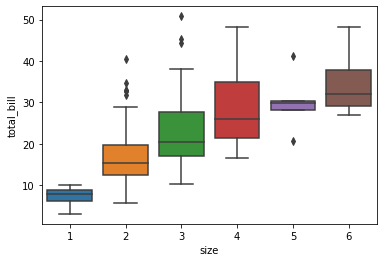

In [548]:
sns.boxplot(x="size",y="total_bill",data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

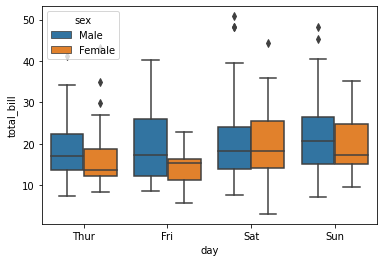

In [549]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df)

In [550]:
# violin grafiği
# yoğunluk grafiği ile kutu grafiğinin birleşimidir

In [551]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


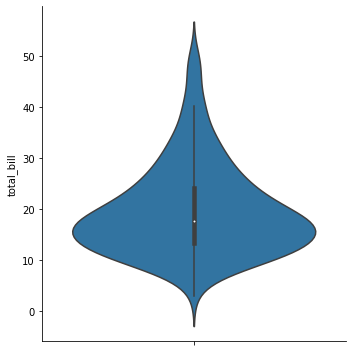

In [552]:
sns.catplot(y="total_bill",kind="violin",data=df)

/Users/mehmetakifkiraz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='total_bill'>

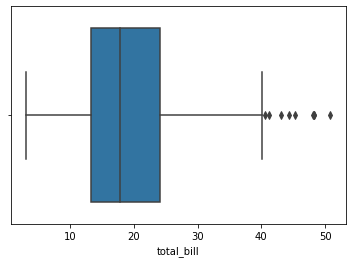

In [553]:
sns.boxplot(x="total_bill",data=df,orient="v")

In [554]:
#violin graik çaprazlamalar

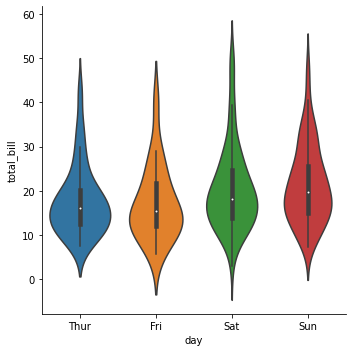

In [555]:
sns.catplot(x="day",y="total_bill",kind="violin",data=df)

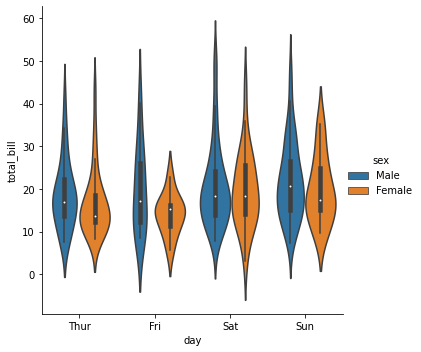

In [556]:
#şimdi ise çaprazlama kırılım ekliyorum
sns.catplot(x="day",y="total_bill",hue="sex",kind="violin",data=df)

In [557]:
#korelasyon grafileri
#korelasyon değişkenler arası ilişkiyi ifade eder

In [558]:
#bunun için en çok kullanılan scatter plottır
#oda saçılım grafiğidir

In [559]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

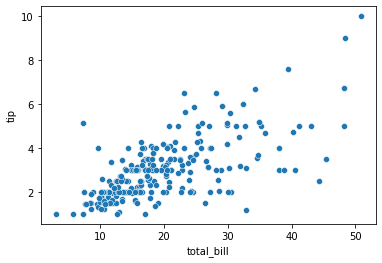

In [560]:
sns.scatterplot(x="total_bill",y="tip",data=df)

In [561]:
#korelasyon çaprazlamalar

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

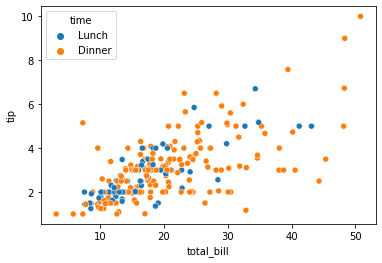

In [562]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df)
#scatterplot önceki kullandıklarımızdan çok farklıdır 
#çünkü istatistiksel bir yöntem olan korelasyonu kullanır
#korelasyonun görsel halidir

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

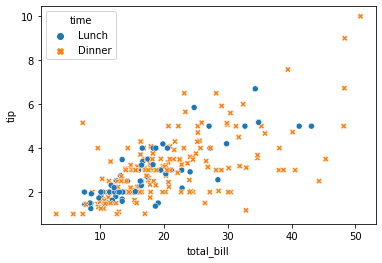

In [563]:
#şimdi style değişkeni ile simgeler göre bölme işlemi yapacağım
sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

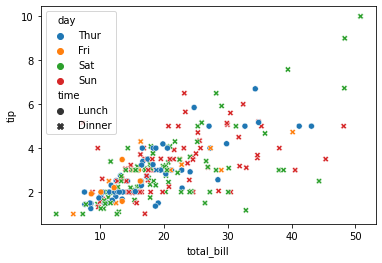

In [564]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

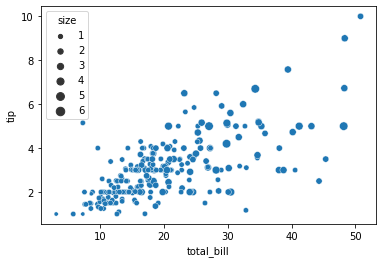

In [565]:
sns.scatterplot(x="total_bill",y="tip",size="size",data=df)
#size burada masalar oturan kişi sayısını ifade ediyor

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

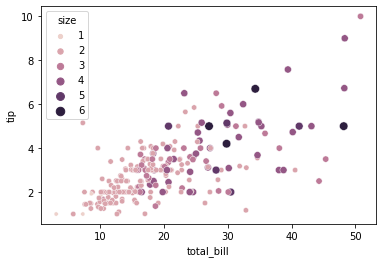

In [566]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df)

In [567]:
#doğrusal ilişkinin gösterilmesi
import matplotlib.pyplot as plt
#burada matplotlib in bütün fonksiyonlarını değilde sadece pyplot fonksiyonlarını import ediyoruz
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


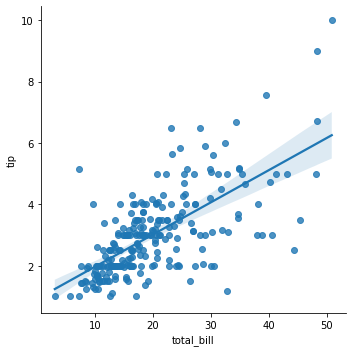

In [568]:
sns.lmplot(x="total_bill",y="tip",data=df)
#buradaki lm linear model in kısaltmasıdır

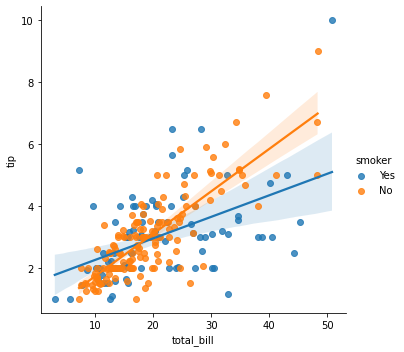

In [569]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df)

In [570]:
#burada ele aldığımız veriyi artık fonksiyonel anlamda değerlendiriyoruz
# eğimler arasında ciddi derecede fark var

In [571]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

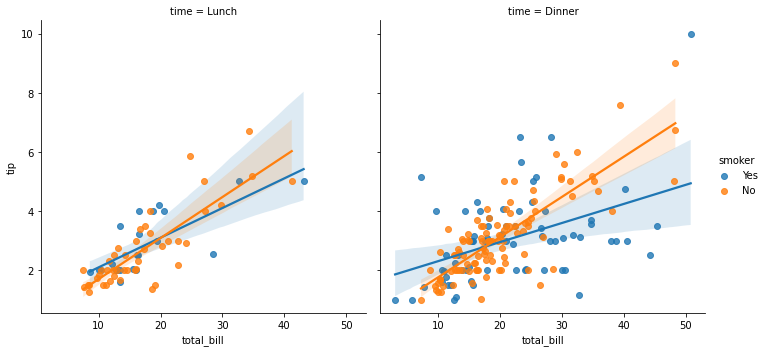

In [572]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df)
#arka taraftaki ilişkileri makine öğrenmeden önce bizim öğrenmemiz gerekiyor
#aradaki farkın anlamlı olup olmadığınında testlerini yapmalıyız

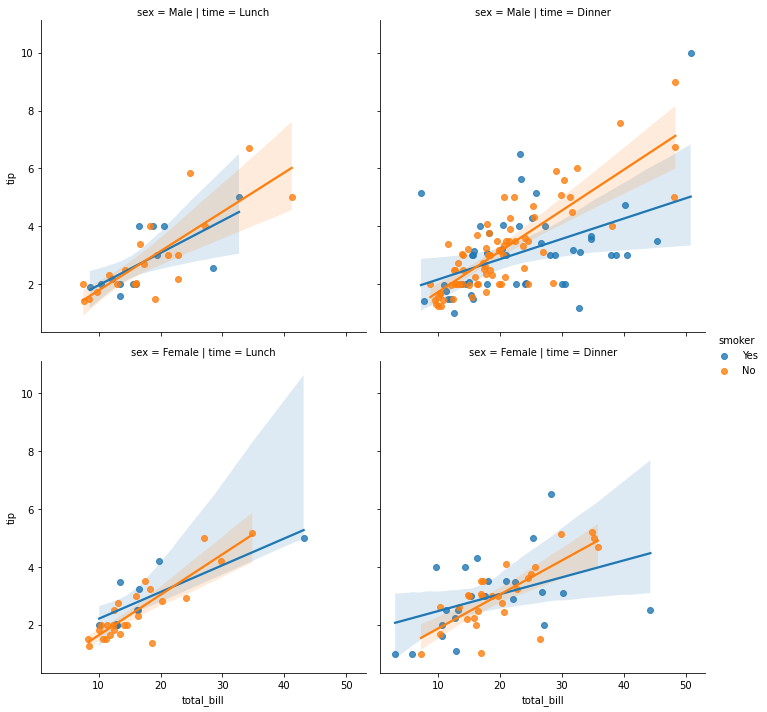

In [573]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df)

In [574]:
#?sns.lmplot

In [575]:
#scatterplot matrisi
iris=sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [576]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [577]:
df.shape

(150, 5)

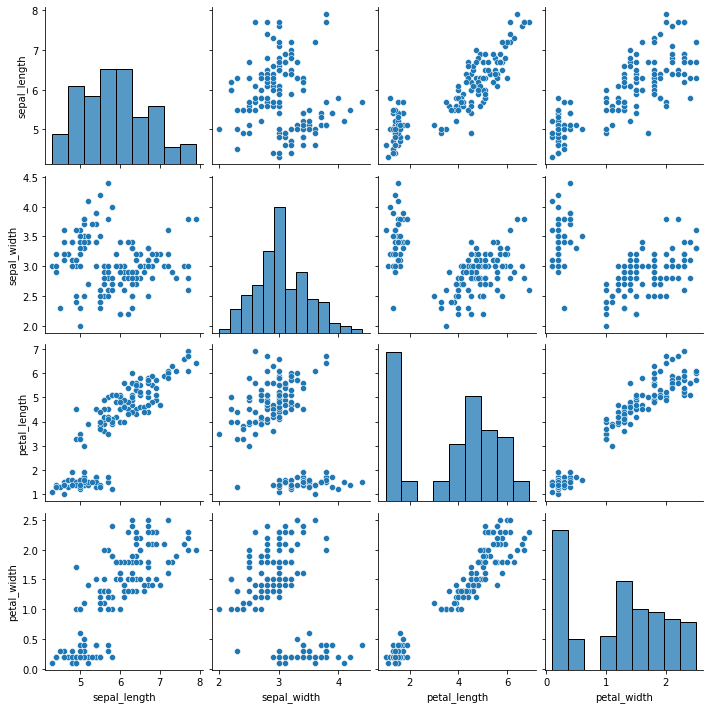

In [578]:
sns.pairplot(df)
#bu değişkenlerin bir birleriyle olan ilişkisini inceler
#çaprazdakiler veri seti içersindeki dağılımları ifade eder

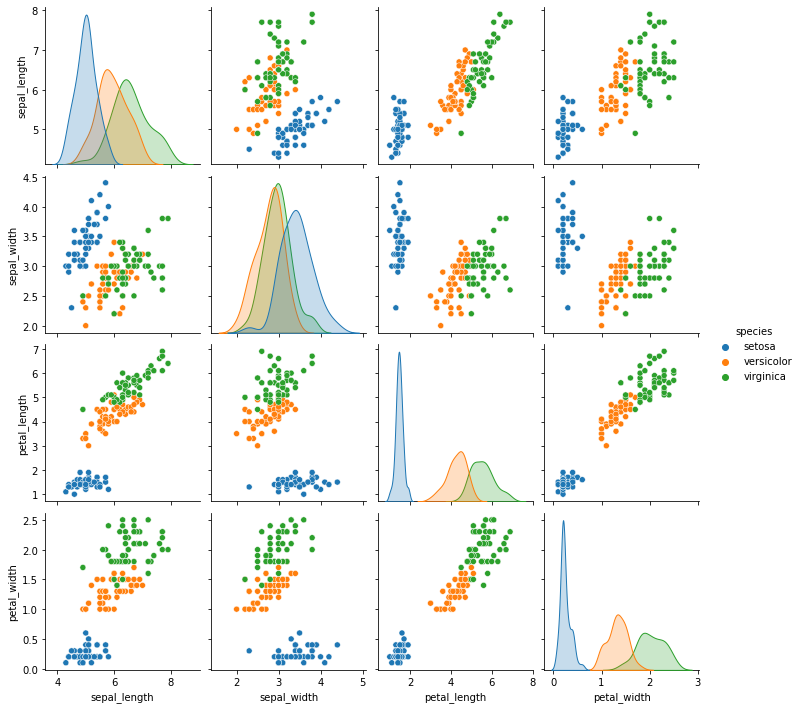

In [579]:
#tür argümanını ekliyorum
sns.pairplot(df,hue="species")

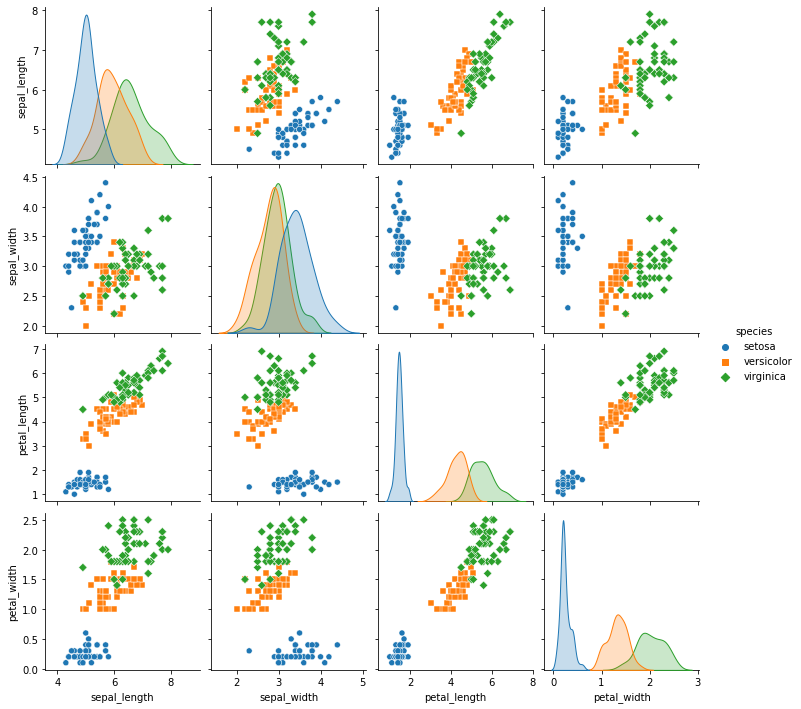

In [580]:
sns.pairplot(df,hue="species",markers=["o","s","D"])

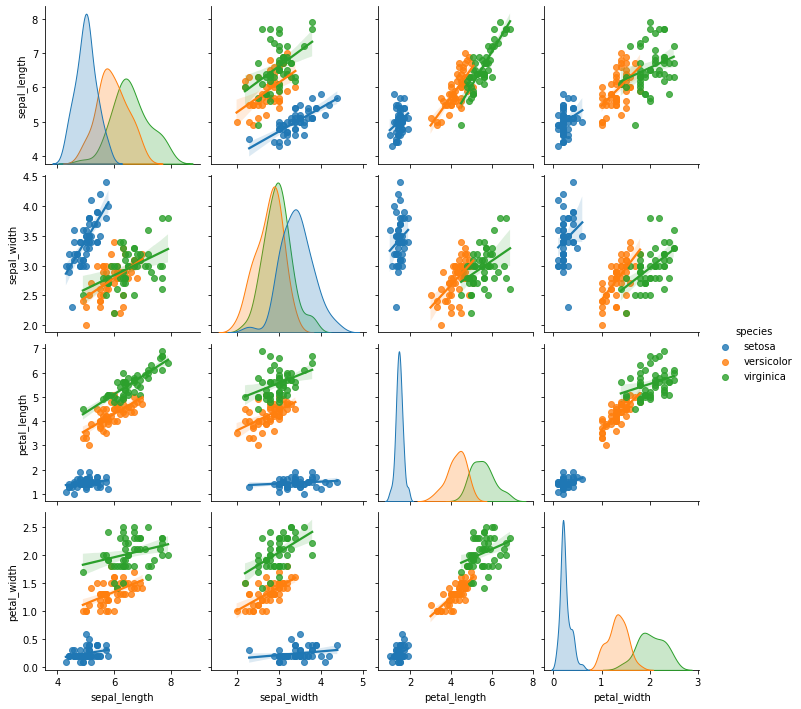

In [581]:
#şimdi ise grafiğe doğru ekliyorum
sns.pairplot(df,kind="reg",hue="species")

In [582]:
#heatmap (ısı haritası)
flights=sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [583]:
df.shape

(144, 3)

In [584]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [585]:
df["passengers"].describe().T

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [586]:
df=df.pivot("month","year","passengers")
#pivot(x,y,kesişim)
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

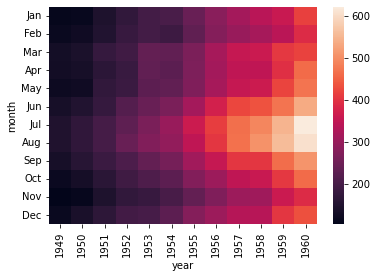

In [587]:
sns.heatmap(df)
#yıllar geçtikçe yolcu sayısı artmıştır
#aynı zamanda yaz aylarında yolcu sayısı daha fazladır

<AxesSubplot:xlabel='year', ylabel='month'>

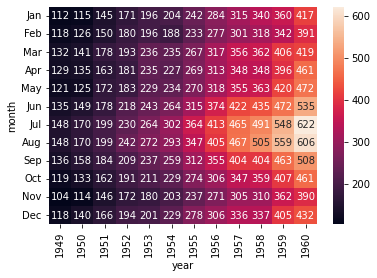

In [588]:
#şimdi hücreleri kendi değerleri ile dolduracağım
sns.heatmap(df,annot=True,fmt="d")

<AxesSubplot:xlabel='year', ylabel='month'>

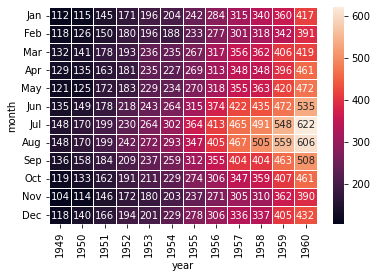

In [589]:
sns.heatmap(df,annot=True,fmt="d",linewidths= .9)

In [590]:
#çizgi grafik 
#daha zor verilerde kullanacağımız bir grafik türüdür

In [591]:
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df.head()
#beyne bağlanan bir cihaz aracılığıyla elde edilen değerleri ifade eden bir veri seti

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [592]:
df.shape

(1064, 5)

In [593]:
df["timepoint"].describe().T

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [594]:
df.signal.describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [595]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [596]:
df.groupby("timepoint")["signal"].mean()

timepoint
0    -0.016662
1    -0.025002
2    -0.012873
3     0.034446
4     0.098194
5     0.137725
6     0.127515
7     0.075660
8     0.013420
9    -0.032041
10   -0.053685
11   -0.058194
12   -0.052526
13   -0.043532
14   -0.033660
15   -0.025880
16   -0.022414
17   -0.021368
18   -0.021867
Name: signal, dtype: float64

In [597]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [598]:
df.groupby("timepoint")["signal"].describe().T

timepoint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.016662,-0.025002,-0.012873,0.034446,0.098194,0.137725,0.127515,0.075660,0.013420,-0.032041,-0.053685,-0.058194,-0.052526,-0.043532,-0.033660,-0.025880,-0.022414,-0.021368,-0.021867
std,0.028326,0.030641,0.035440,0.058260,0.092838,0.123353,0.137332,0.129704,0.104216,0.072728,0.053148,0.053828,0.056991,0.053598,0.045983,0.039092,0.035035,0.034797,0.036322
min,-0.064454,-0.082174,-0.110565,-0.089708,-0.046347,-0.017946,-0.054405,-0.108222,-0.181241,-0.152929,-0.176453,-0.238474,-0.255486,-0.224351,-0.169312,-0.134828,-0.131641,-0.121574,-0.103513
25%,-0.039169,-0.046299,-0.034944,-0.001157,0.030912,0.042762,0.022409,-0.016252,-0.049453,-0.075693,-0.078893,-0.093127,-0.090391,-0.069285,-0.055110,-0.050536,-0.041122,-0.042946,-0.046781
50%,-0.018382,-0.024533,-0.013183,0.028430,0.070166,0.096535,0.068850,0.032486,-0.012834,-0.038496,-0.052906,-0.045699,-0.042294,-0.031612,-0.022165,-0.018207,-0.020777,-0.017070,-0.020225
75%,0.003539,-0.005388,0.009318,0.061840,0.144911,0.211638,0.218919,0.144781,0.030396,0.008717,-0.015302,-0.022522,-0.016239,-0.012958,-0.006797,0.000486,-0.001380,-0.000026,-0.002821
max,0.074399,0.063558,0.077277,0.185581,0.346775,0.476055,0.564985,0.494787,0.337143,0.221716,0.089231,0.030528,0.055766,0.059510,0.050133,0.047102,0.057105,0.073757,0.090520


In [599]:
#şimdi ise sinyaller eşsiz mi onu kontrol edeceğiz
df.groupby("signal")["timepoint"].count()

signal
-0.255486    1
-0.238474    1
-0.224351    1
-0.181241    1
-0.178510    1
            ..
 0.455575    1
 0.460896    1
 0.476055    1
 0.494787    1
 0.564985    1
Name: timepoint, Length: 1064, dtype: int64

In [600]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [601]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [602]:
#çizgi grafiğinin oluşturulması (line plot)

In [603]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

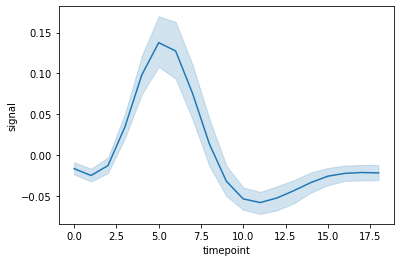

In [604]:
sns.lineplot(x="timepoint",y="signal",data=df)
#zaman değerlerine göre sinyallerin artış ve azalışı hakkında bize bilgi veriyor
#veri biliminde grafiğin bize söylemediği ne var diye düşünmemiz gerekiyor

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

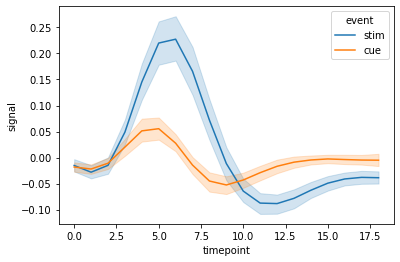

In [605]:
#kategorik bir değişken eklenerek grafik daha açıklayıcı bir hale getirilebiliyormuş
sns.lineplot(x="timepoint",y="signal",hue="event",data=df)
#meğerse peak yapan noktalar stime aitmiş

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

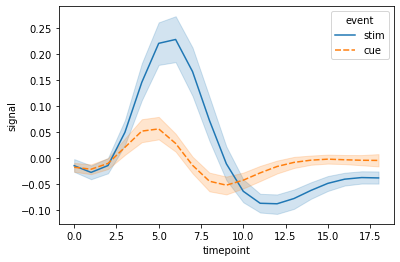

In [606]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

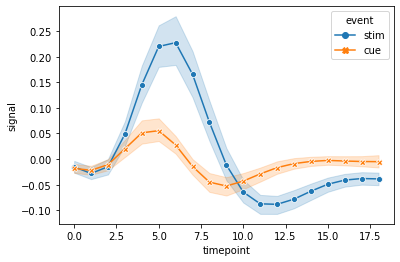

In [607]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers=True,
             dashes=False,
             data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

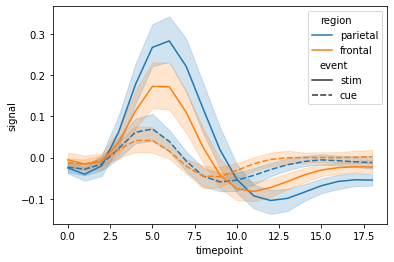

In [608]:
sns.lineplot(x="timepoint",
            y="signal",
            hue="region",
            style="event",data=df)

In [609]:
#basit zaman serisi grafiği
!pip install pandas_datareader
import pandas_datareader as pr
#anakonda içerisinde yer alan kütüphaneleri direk import edebiliyoruz
#lakin anakonda içerisinde yer almıyorsa piple indirmemiz lazım

In [610]:
#veri setimiz apple ın zamana bağlı veri seti
df=pr.get_data_yahoo("APPL",start="2016-01-01" ,end="2019-08-01")
df.head()

KeyError: 'Date'